In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression #For classification task
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score, ConfusionMatrixDisplay, roc_curve
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv("../Datasets/post_pandemic_remote_work_health_impact_2025.csv")

In [45]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


In [49]:
df.isna().sum()

Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64

### DATA CLEANING 

In [50]:
#changing the data type of the survey_Date from int64 to datetime

df['Survey_Date'] =  pd.to_datetime(df['Survey_Date'])

#about 38% of the mental_health_status data is missing, it is more reasonable to input with unknown, cause it is frequent.  
df['Mental_Health_Status'] = df['Mental_Health_Status'].fillna('Unknown')

#11% of the physical_health_issues is missing, I could fill with mode, but the top few are in close frequency -- it is better to go with unknown too. 
df['Physical_Health_Issues'] = df['Physical_Health_Issues'].fillna('Unknown')

In [51]:
df.isna().sum()

Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
dtype: int64

In [52]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,Unknown,Medium,5,Unknown,4,$60K-80K


### EXPLORATORY DATA ANALYSIS 

#### UNIVARIATE ANALYSIS

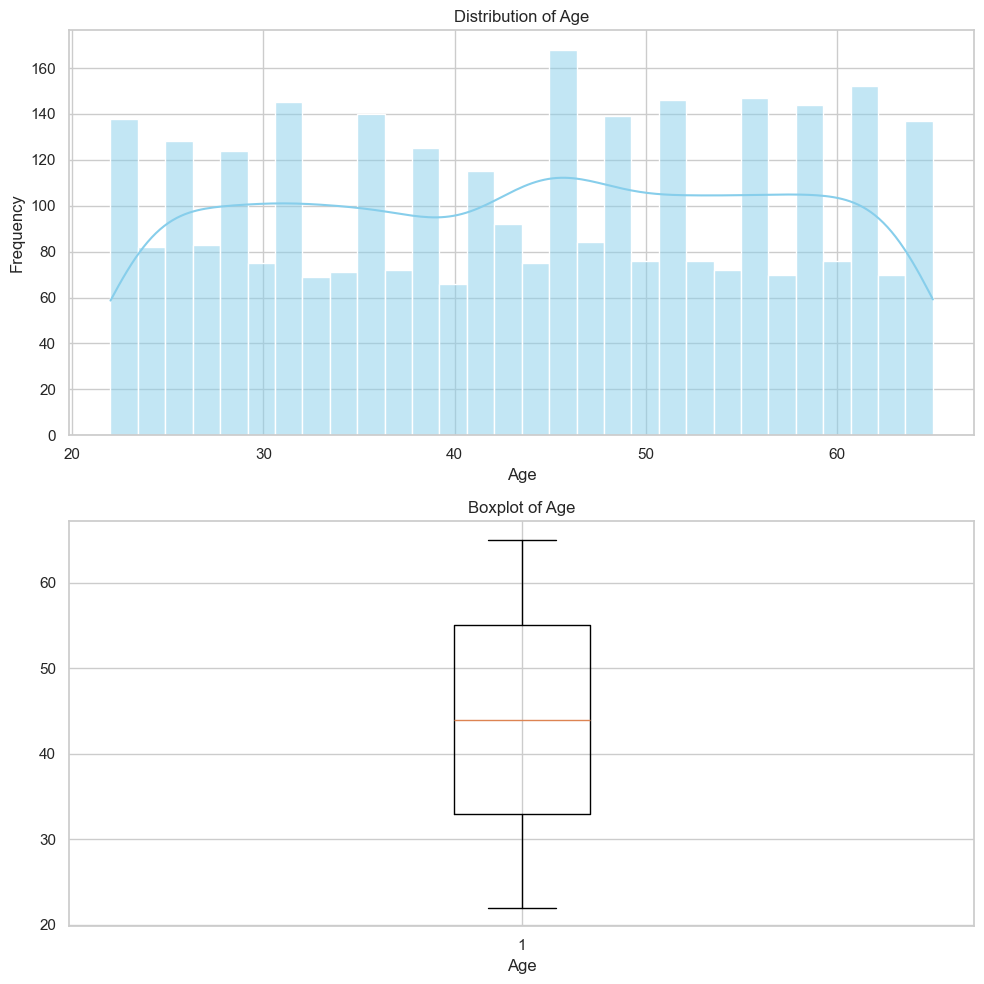

In [53]:
# AGE 
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.histplot(data=df, x='Age',bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.boxplot(data=df, x='Age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True)

plt.tight_layout()
plt.show()


### Key Insight from the Age Distrbution 
The age distribution chart shows that the ages of post-pandemic remote workers range from 22 to 65 years, with the most common (modal) age being around 43 years and the mean age approximately 43.7 years. The histogram indicates a relatively even spread across this range, suggesting a diverse workforce in terms of age. The boxplot reveals no significant outliers, indicating that the age data is consistent and reliable. This distribution suggests that remote work is prevalent among individuals in their prime working years, who likely have significant professional and personal responsibilities.

In [54]:
df['Age'].mean()

np.float64(43.73202407348749)

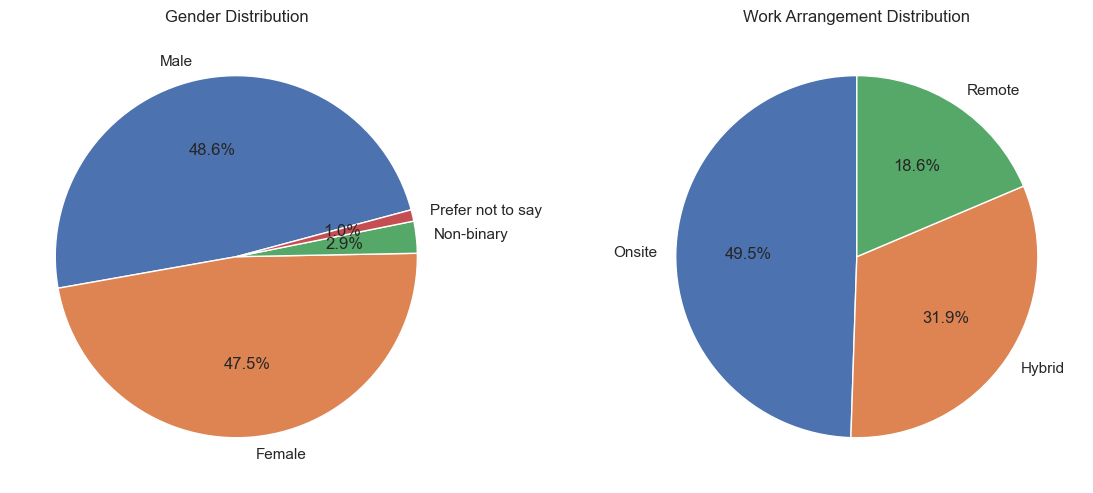

In [55]:
# GENDER AND WORK ARRANGEMENT ANALYSIS
# Analysis with Numpy
gender_count = df['Gender'].value_counts()
work_count = df['Work_Arrangement'].value_counts()

gender_label = gender_count.index.to_numpy()
gender_sizes = gender_count.values

work_label = work_count.index.to_numpy()
work_sizes = work_count.values

#Gender and Work Arrangement Visualization
plt.figure(figsize=(25, 10))

plt.subplot(2, 1, 1)
plt.pie(gender_sizes, labels=gender_label, autopct='%1.1f%%', startangle=15)
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
plt.pie(work_sizes, labels=work_label, autopct='%1.1f%%', startangle=90)
plt.title('Work Arrangement Distribution')
plt.tight_layout()
plt.show()

### Key Insights
- The Gender distribution insinuates that the male to female ratio population in the data are not of much significance. 
-- This means that both genders are well involved and computer/software literacy is not limited to a specific gender. 
- The work arrangement distribution highlights that approx. half of the workers are onsite with 31.9% of them is hybrid, with few working remotely.
-- This could be as a result of most of the Job Roles being in professional industry, which indicates a need for physical consultation to build trust between the professionals and clients.
- This indicates that, despite the rise of remote work, onsite and hybrid arrangements remain prevalent, possibly due to job requirements or organizational preferences.  


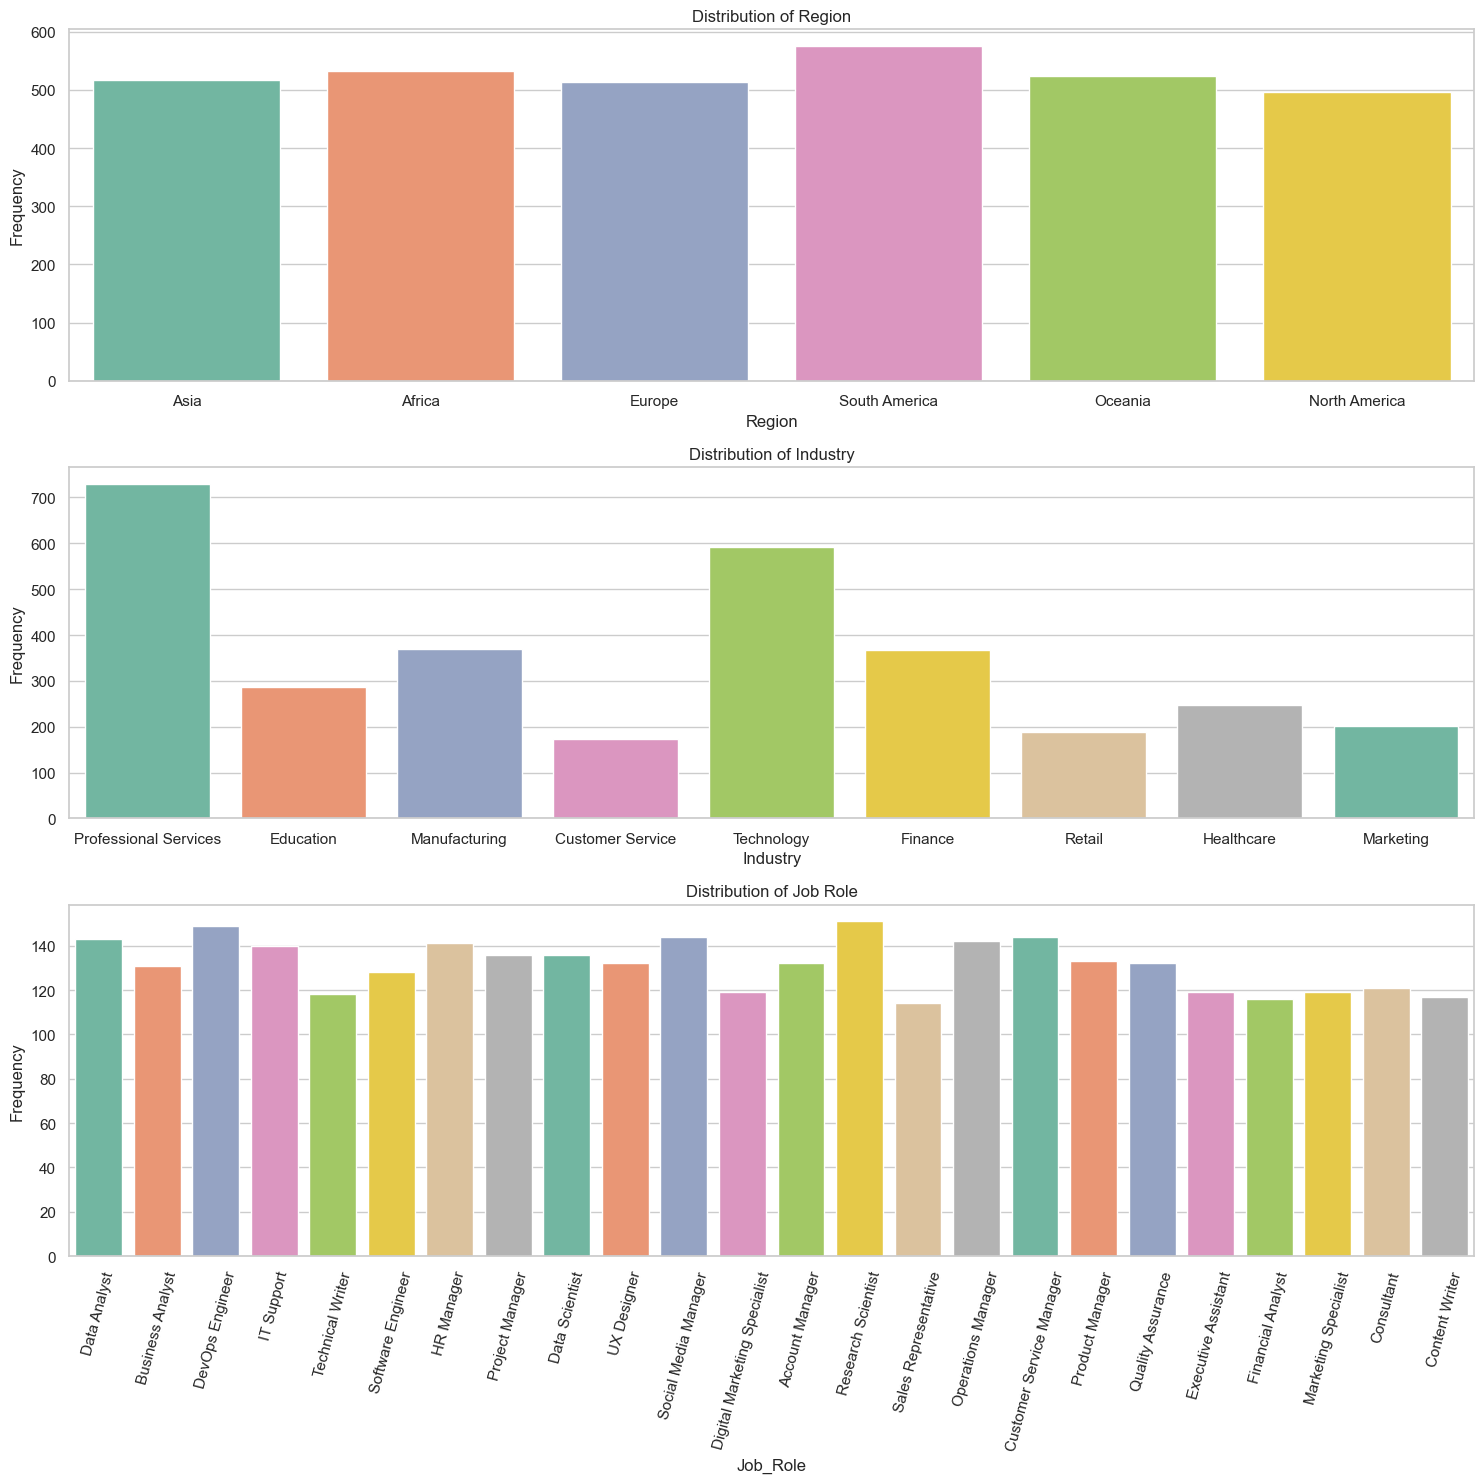

In [56]:
# Region, Industry, Job Roles Analysis

plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.countplot( data=df, x='Region', palette='Set2')
plt.title('Distribution of Region')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
sns.countplot( data=df, x='Industry', palette='Set2')
plt.title('Distribution of Industry')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.countplot( data=df,  x='Job_Role', palette='Set2')
plt.title('Distribution of Job Role')
plt.ylabel('Frequency')
plt.xticks(rotation= 75)

plt.tight_layout()
plt.show()

The distribution plots for Region, Industry, and Job Role reveal several key insights:

- Region: South America has the highest representation among post-pandemic remote workers, followed by Africa, Asia, and Oceania. This suggests that remote work adoption is particularly strong in South America and Africa, possibly due to their rapidly growing tech markets.

- Industry: The most common industry is Professional Services, indicating that many remote workers are engaged in roles that require specialized knowledge or consulting. Other industries are present but less dominant, highlighting the concentration of remote work in professional and knowledge-based sectors.

- Job Role: Research Scientist is the most frequent job role, followed by DevOps Engineer and Social Media Manager. This suggests that technical and research-oriented positions are well-suited to remote or hybrid work arrangements, and these roles are in high demand in the post-pandemic workforce.

Overall, the data shows that remote work is prevalent in regions with emerging tech industries, is concentrated in professional services, and is most common among research and technical job roles.

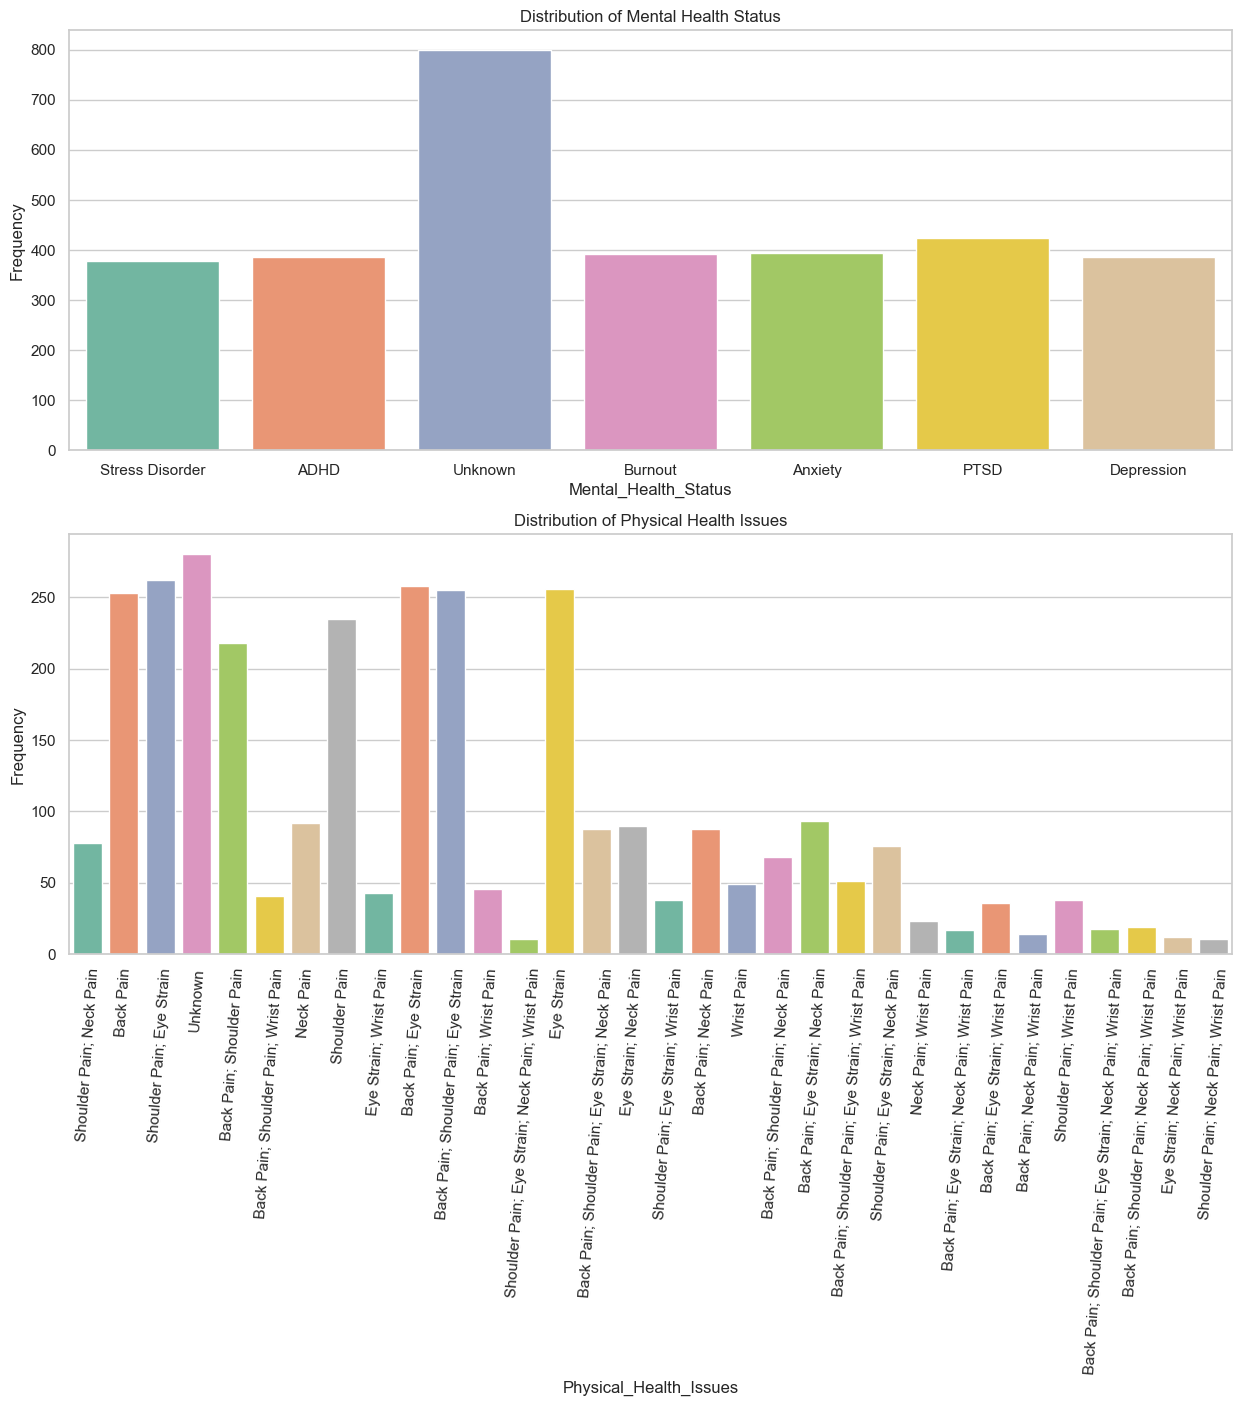

In [57]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.countplot( data=df, x='Mental_Health_Status', palette='Set2')
plt.title('Distribution of Mental Health Status')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
sns.countplot( data=df, x='Physical_Health_Issues', palette='Set2')
plt.title('Distribution of Physical Health Issues')
plt.ylabel('Frequency')
plt.xticks(rotation= 86)

plt.show()
plt.show()



### Interpretation and Indications: Mental Health Status & Physical Health Issues

- Mental Health Status: 
The distribution shows that a significant portion of remote workers report experiencing mental health challenges such as stress disorders, ADHD, PTSD, and depression. The presence of a large "Unknown" category suggests either underreporting or lack of diagnosis, which may indicate stigma or limited access to mental health resources. High and medium burnout levels are prevalent, highlighting the psychological demands of remote and hybrid work environments.

- Physical Health Issues:
Commonly reported physical health issues include shoulder pain, neck pain, back pain, and eye strain. These are typical of prolonged computer use and sedentary work styles associated with remote work. The "Unknown" category again suggests some respondents may not recognize or report their symptoms. The data underscores the need for ergonomic interventions and regular health assessments to mitigate these risks.

#### Indications:
- Organizations should prioritize mental health support, including counseling and stress management resources.
- There is a clear need for ergonomic education and workplace adjustments to reduce physical health complaints.
- The high frequency of both mental and physical health issues signals the importance of holistic well-being programs for remote and hybrid workers.


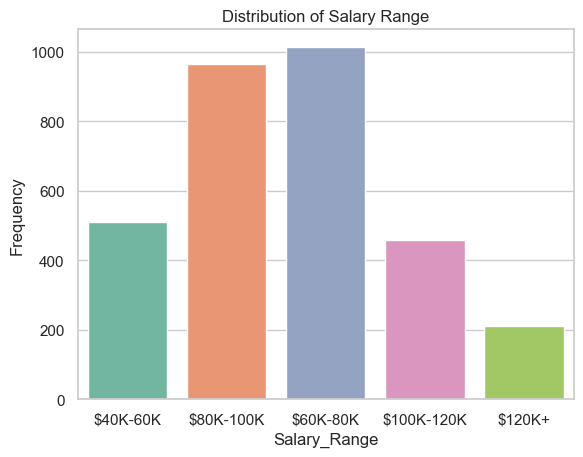

In [58]:
sns.countplot( data=df, x='Salary_Range', palette='Set2')
plt.title('Distribution of Salary Range')
plt.ylabel('Frequency')
plt.xticks()

plt.show()

### Interpretation and Indications: Salary Range Distribution

- Salary Range Distribution:
The distribution of salary ranges among post-pandemic remote workers shows a concentration in the mid to upper salary brackets, with the majority earning between $60K and $100K. There are also notable groups in both the lower ($40K-$60K) and higher ($100K-$120K) salary ranges. This suggests that remote and hybrid work opportunities are accessible across a wide spectrum of income levels, but are particularly prevalent among mid-career professionals.

#### Indications:
- The strong representation in the $60K-$100K range indicates that remote work is common in roles that require specialized skills and experience, which are typically compensated at higher rates.
- The presence of workers in lower salary brackets suggests that entry-level and support roles are also being performed remotely, reflecting the broadening adoption of flexible work arrangements.
- The distribution highlights the need for organizations to ensure pay equity and transparency across different work arrangements and job roles.
- Companies may need to tailor benefits and support programs to address the diverse financial situations of their remote workforce, ensuring that both lower and higher earners have access to necessary resources and opportunities for advancement.

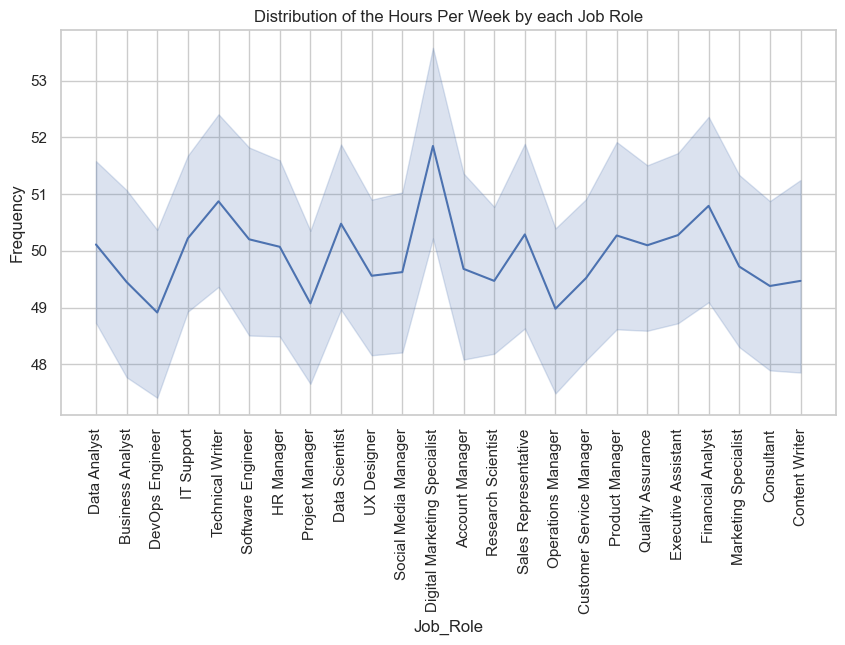

In [59]:
#df['Hours_Per_Week'] = df['Hours_Per_Week'].sort_values
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Job_Role', y='Hours_Per_Week', markers='o')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Distribution of the Hours Per Week by each Job Role')

plt.show()



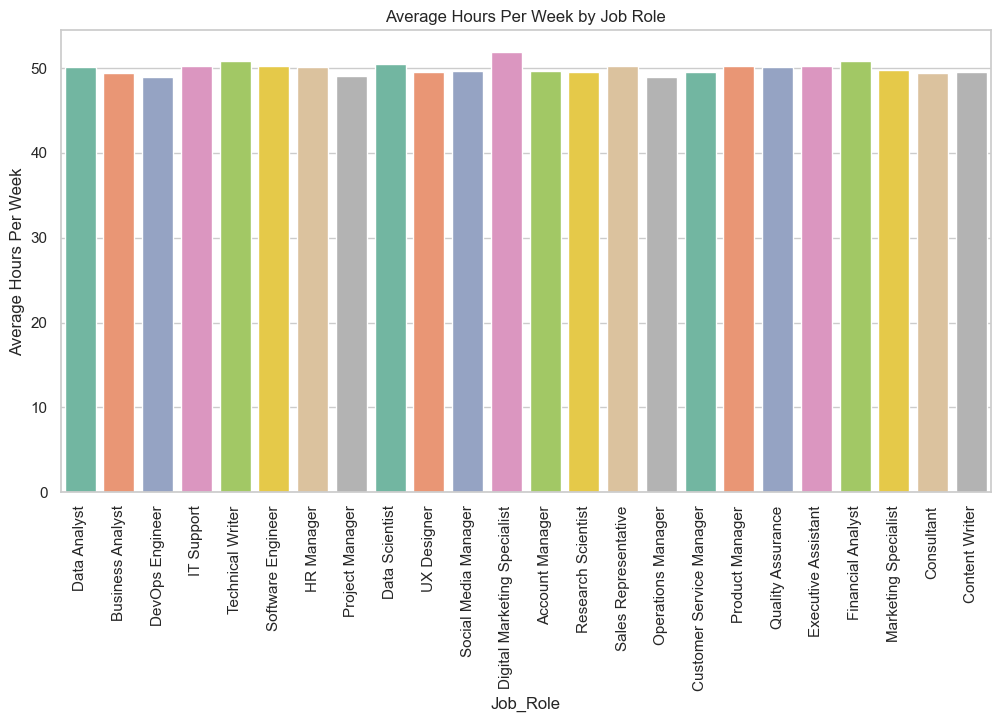

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Job_Role', y='Hours_Per_Week', ci=None, palette="Set2")
plt.xticks(rotation=90)
plt.ylabel('Average Hours Per Week')
plt.title('Average Hours Per Week by Job Role')
plt.show()

### Average Hours Per Week by Job Role

- Interpretation:
The bar chart displaying the average hours worked per week by job role reveals notable differences across various positions. Certain roles, such as DevOps Engineer, Operations Manager, and Research Scientist, tend to have higher average weekly hours, often exceeding 50 hours per week. In contrast, roles like HR Manager and Technical Writer generally report lower average weekly hours, closer to the standard 40-hour workweek. This variation suggests that job responsibilities and expectations differ significantly depending on the role.

Indications:
- Roles with higher average weekly hours may be more susceptible to overwork, stress, and potential burnout, highlighting the need for targeted interventions such as workload management and wellness programs.
- Organizations should monitor and address excessive working hours in specific job roles to promote work-life balance and prevent negative health outcomes.
- The data can inform HR policies, helping to set realistic expectations for different roles and ensuring equitable distribution of workload.
- Employees in roles with lower average hours may benefit from opportunities for professional development or expanded responsibilities if desired.


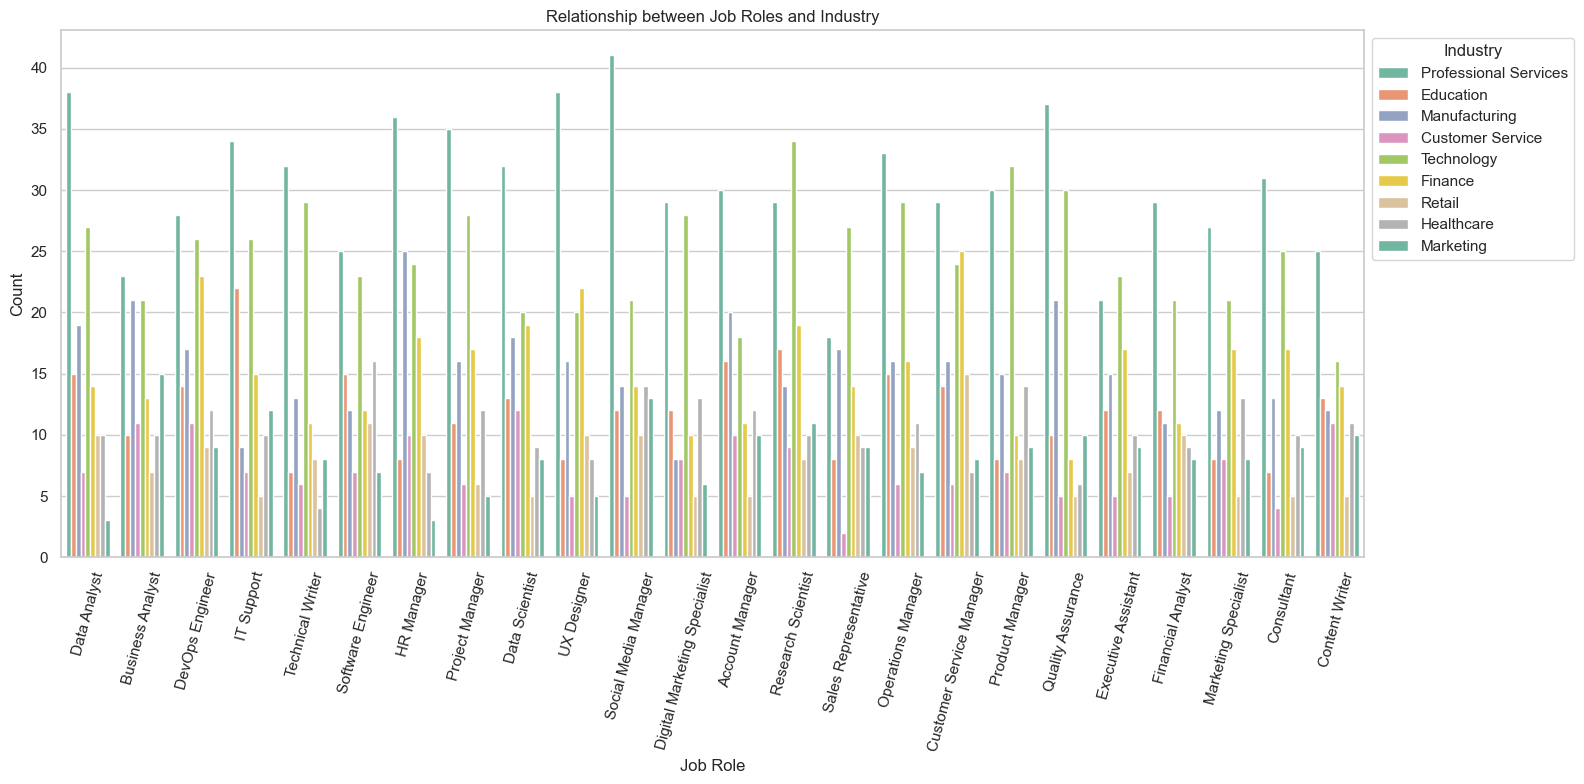

In [61]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Job_Role', hue='Industry', palette='Set2')
plt.title('Relationship between Job Roles and Industry')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.legend(title='Industry', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Relationship between Job Role and Industry

The countplot visualizing the relationship between Job Role and Industry reveals that certain job roles are highly concentrated within specific industries. For example, Research Scientists and DevOps Engineers are predominantly found in Professional Services and Technology sectors, while roles like HR Manager and Technical Writer are more evenly distributed across multiple industries. Some industries, such as Education and Healthcare, have a diverse mix of job roles, indicating a broader range of functions within those sectors.

Indications:
- The clustering of technical roles (e.g., DevOps Engineer, Software Engineer) in Professional Services and Technology suggests these industries are driving demand for specialized technical expertise in the post-pandemic workforce.
- The presence of research and analytical roles across various industries highlights the growing importance of data-driven decision-making and innovation.
- Industries with a wide variety of job roles may offer more opportunities for career mobility and interdisciplinary collaboration.
- Organizations can use these insights to tailor recruitment and professional development strategies, focusing on the most in-demand roles within their industry.
- Understanding the distribution of job roles by industry can help policymakers and educators align training programs with labor market needs, ensuring a better match between workforce skills and employer demand.

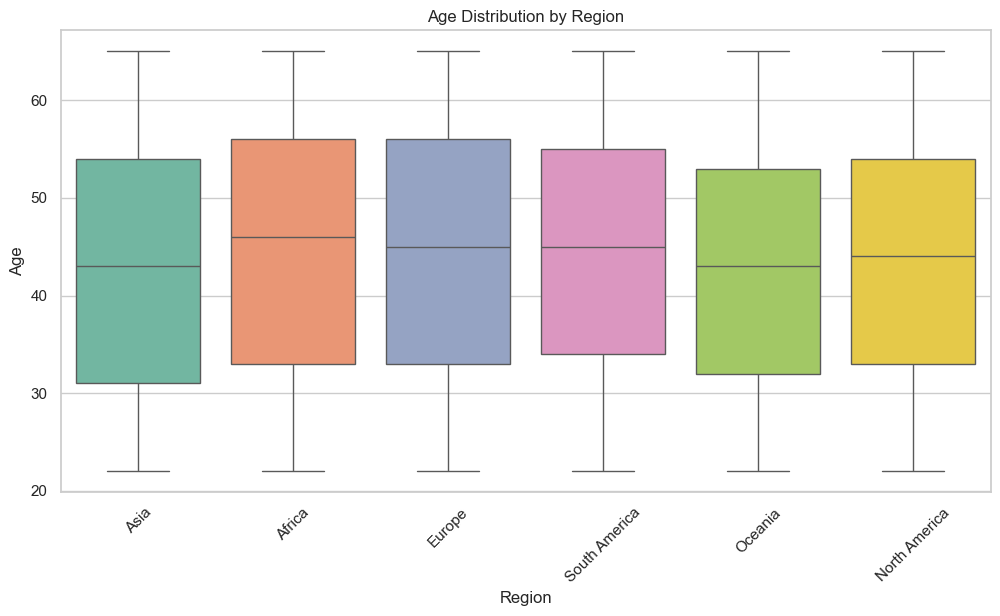

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Age', palette='Set2')
plt.title('Age Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

### Age Distribution by Region
The boxplot of age distribution by region reveals notable differences in the age profiles of remote workers across various regions. Some regions, such as North America and Europe, display a wider age range and higher median ages, indicating a more experienced workforce. In contrast, regions like Asia and Africa may have a younger median age, suggesting a younger demographic is more engaged in remote work in these areas. The spread and presence of outliers in certain regions highlight the diversity of age groups participating in remote work globally.

Indications:
- Regions with a higher median age may benefit from policies that support experienced professionals, such as flexible retirement options or upskilling programs.
- Younger median ages in some regions suggest opportunities for entry-level remote work and the need for mentorship or early-career development initiatives.
- The diversity in age distribution across regions underscores the importance of region-specific HR strategies to address the unique needs of different age groups.
- Organizations operating globally should consider cultural and demographic factors when designing remote work policies, ensuring inclusivity and support for all age groups.
- Understanding regional age trends can help companies tailor wellness, engagement, and professional development programs to maximize productivity and satisfaction among remote workers.

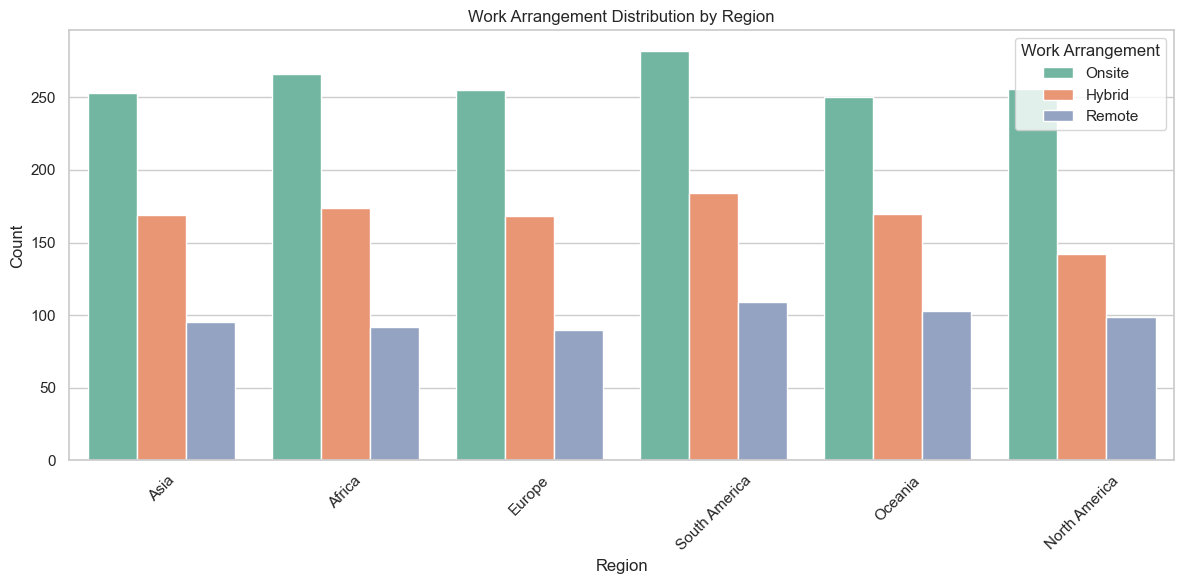

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='Work_Arrangement', palette='Set2')
plt.title('Work Arrangement Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Work Arrangement')
plt.tight_layout()
plt.show()

### Work Arrangement Distribution by Region

- Interpretation:
    The countplot of work arrangement distribution by region shows how different regions favor various work setups (Onsite, Hybrid, Remote). Some regions, such as South America and Africa, have a higher proportion of onsite workers, while regions like North America and Europe display a more balanced mix of onsite, hybrid, and remote arrangements. Remote work is less prevalent in certain regions, possibly due to infrastructure, industry type, or cultural preferences.

- Indications:
    - Regions with a high onsite workforce may face challenges in adopting flexible work policies, possibly due to industry requirements or limited remote work infrastructure.
    - The presence of hybrid and remote arrangements in regions like North America and Europe suggests greater flexibility and technological readiness, which can attract a diverse talent pool and support work-life balance.
    - Organizations operating in regions with low remote work adoption may need to invest in digital infrastructure and training to enable more flexible work options.
    - Understanding regional preferences for work arrangements can help companies tailor their HR policies, ensuring they remain competitive and responsive to local workforce expectations.
    - Policymakers can use these insights to promote digital inclusion and support the transition to flexible work models, especially in regions where remote work is less common.

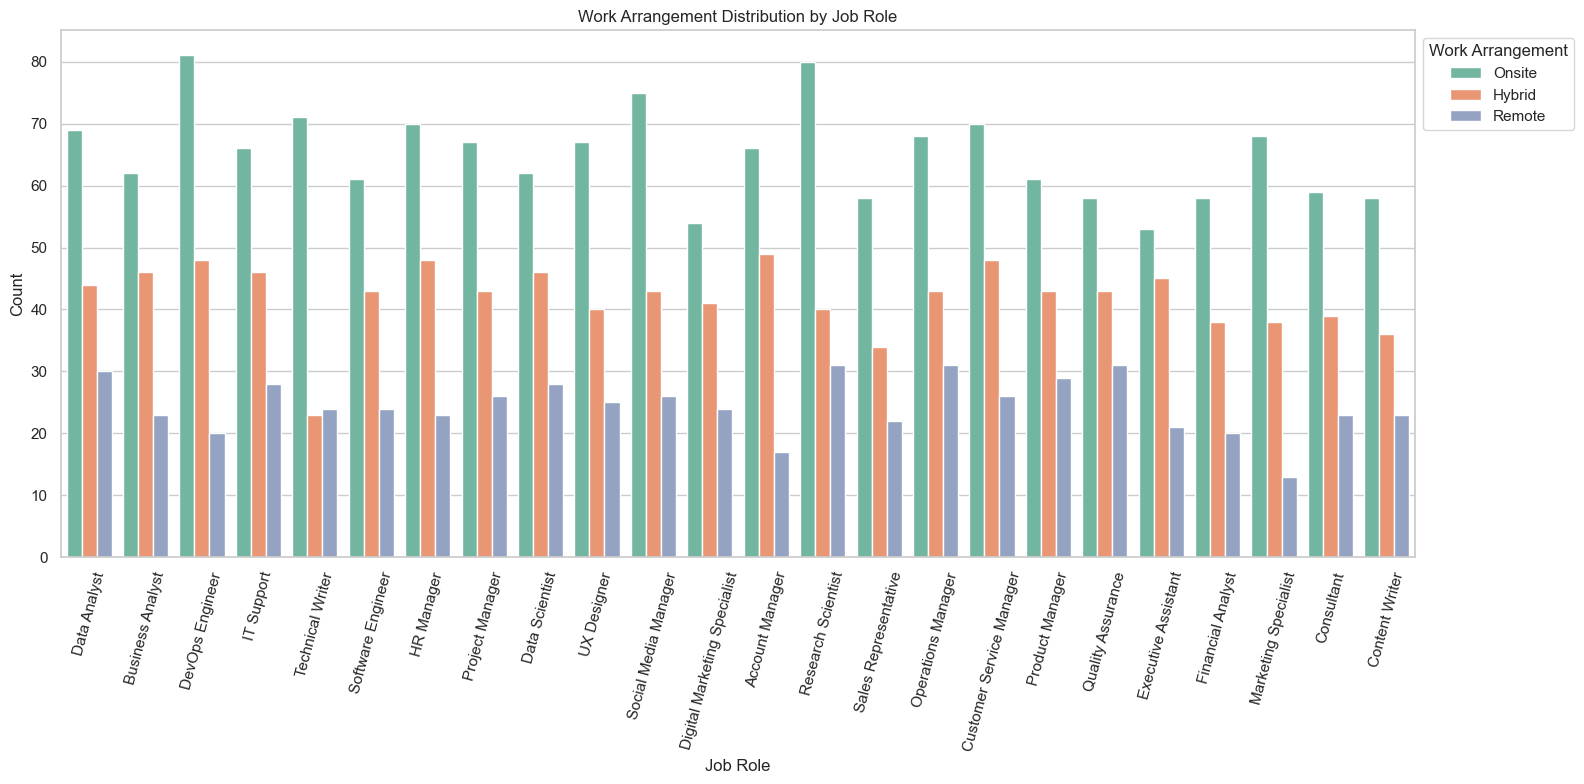

In [64]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Job_Role', hue='Work_Arrangement', palette='Set2')
plt.title('Work Arrangement Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.legend(title='Work Arrangement', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Work Arrangement per Job Role Distribution
The distribution of employees across different work arrangements—remote, onsite, and hybrid—varies notably by job role. Roles such as DevOps Engineer and Research Scientist exhibit a higher concentration of onsite workers, likely due to the technical or operational nature of their responsibilities, which may require access to physical infrastructure or close team coordination.

In contrast, roles such as Technical Writer and Software Engineer display a greater presence in remote or hybrid settings, reflecting the flexibility inherent in these functions, where tasks can be effectively executed without being physically present at the workplace. Customer-facing and managerial roles, including Customer Service Manager and HR Manager, tend to be more commonly associated with onsite or hybrid arrangements, possibly driven by the need for interpersonal collaboration and real-time team management.

Key Insights and Organizational Implications
- Role Suitability for Remote Work:
Roles involving digital content creation or independent technical work—such as software engineering and technical writing—demonstrate high adaptability to remote or hybrid models. This suggests that organizations can confidently offer flexible work options for these positions without compromising productivity.

- Onsite Operational Necessity:
Positions that involve equipment handling, infrastructure oversight, or close team supervision (e.g., operations management, DevOps) are more often located onsite. This highlights the operational need for physical presence in these roles.

- Prevalence of Hybrid Arrangements:
A significant proportion of roles are categorized under hybrid work, indicating a broader organizational shift toward flexible work structures that aim to balance performance with employee well-being.

- Recruitment and Talent Management:
Understanding these patterns allows organizations to better align job offerings with market expectations. Candidates are increasingly factoring in work arrangement preferences when evaluating roles. Clear role-specific policies can serve as a competitive advantage in talent acquisition and retention.

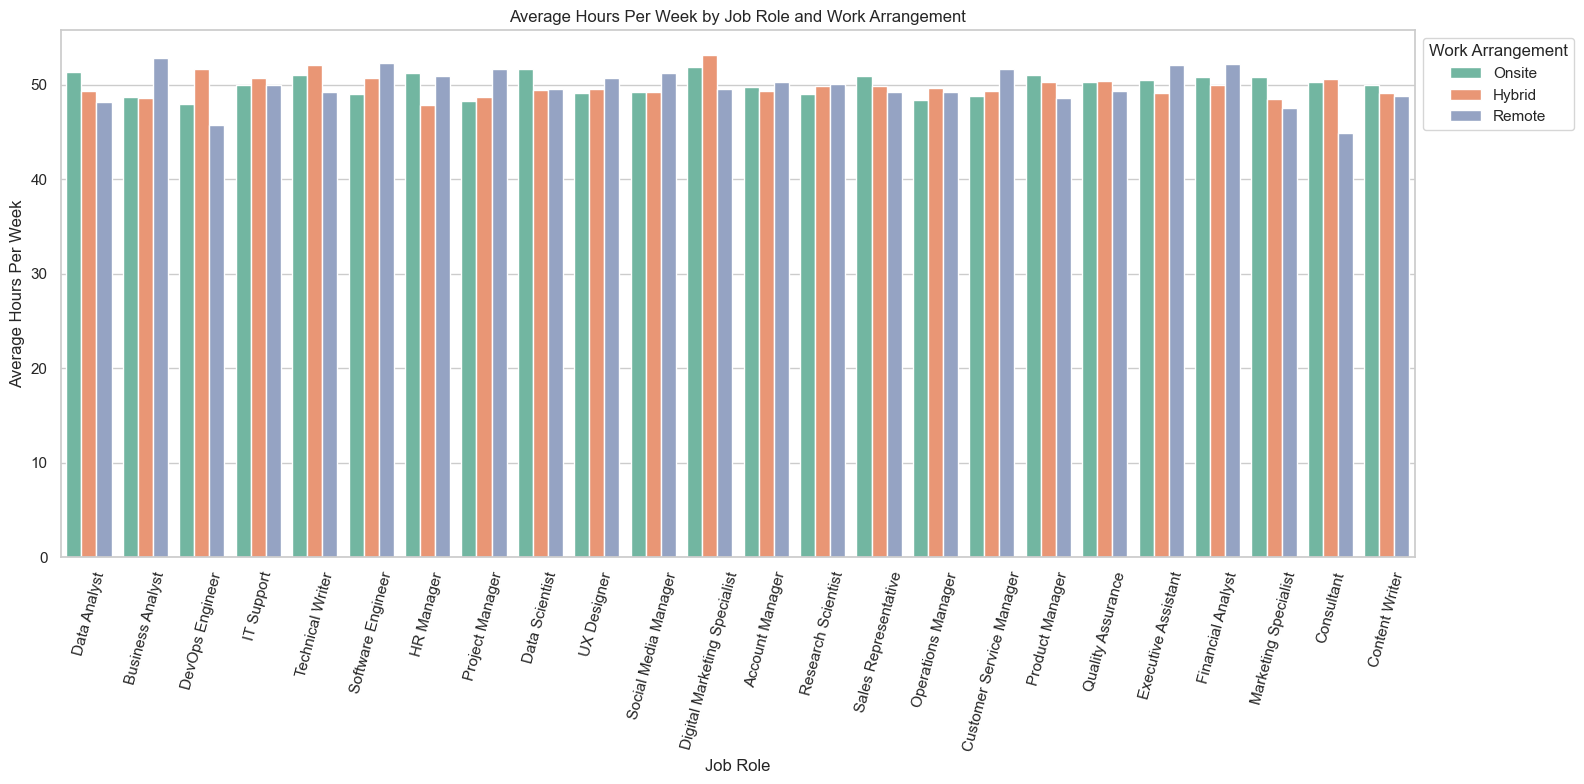

In [65]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x='Job_Role', y='Hours_Per_Week', hue='Work_Arrangement', ci=None, palette='Set2')
plt.title('Average Hours Per Week by Job Role and Work Arrangement')
plt.xlabel('Job Role')
plt.ylabel('Average Hours Per Week')
plt.xticks(rotation=75)
plt.legend(title='Work Arrangement', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Average Hours Per Week by Job Role and Work Arrangement

The grouped bar chart of average hours per week by job role and work arrangement reveals clear patterns in workload distribution. Certain job roles, such as DevOps Engineer, Operations Manager, and Research Scientist, consistently report higher average weekly hours, especially in onsite and hybrid arrangements. In contrast, roles like Technical Writer and HR Manager tend to have lower average hours, regardless of work arrangement. Remote roles generally show slightly lower average hours compared to onsite and hybrid, suggesting that remote work may facilitate better work-life balance for some positions.

Indications:
- Work Arrangement Impact: Onsite and hybrid roles often demand more hours, possibly due to increased meetings, collaboration, or operational responsibilities that require physical presence.
- Role-Specific Demands: Technical and managerial roles are more likely to experience longer working hours, indicating a need for targeted workload management and wellness initiatives in these groups.
- Remote Work Benefits: The trend of lower average hours in remote roles highlights the potential of remote work to reduce overwork and support employee well-being.
- Policy Implications: Organizations should monitor working hours across different job roles and arrangements to prevent burnout, promote work-life balance, and tailor interventions where necessary.
- Talent Management: Understanding these patterns can help HR teams design flexible work policies and set realistic expectations for employees, improving job satisfaction and retention.

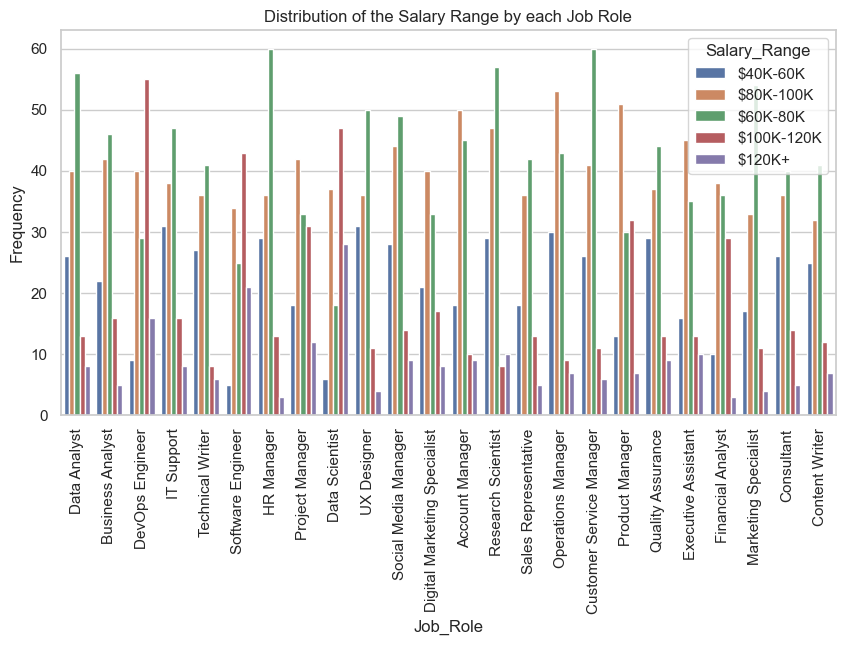

In [66]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Job_Role', hue='Salary_Range')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Distribution of the Salary Range by each Job Role')

plt.show()

### Distribution of the Salary Range by Each Job Role

The countplot of salary range distribution by job role reveals clear differences in compensation across various positions. Technical and managerial roles such as DevOps Engineer, Operations Manager, and Research Scientist tend to be more represented in higher salary brackets (e.g., $80K-$100K, $100K-$120K). In contrast, roles like HR Manager, Technical Writer, and Customer Service Manager are more frequently found in lower or mid-range salary categories. Some roles, such as Software Engineer and Data Analyst, show a broad spread across multiple salary ranges, indicating diverse experience levels and organizational contexts.

Indications:
- Role-Specific Compensation: Higher salaries are typically associated with roles requiring specialized technical expertise or significant managerial responsibility. Organizations should ensure that compensation reflects the complexity and demands of each job role.
- Pay Equity Considerations: The variation in salary ranges across roles highlights the importance of regular pay equity reviews to prevent disparities and ensure fair compensation practices.
- Talent Attraction and Retention: Understanding which roles command higher salaries can help organizations tailor their recruitment and retention strategies, offering competitive packages for in-demand positions.
- Career Progression: The spread of salary ranges within certain roles suggests opportunities for career advancement and salary growth, which can be emphasized in employee development programs.
- Policy Development: Insights from salary distribution can inform HR policies related to compensation, benefits, and professional development, supporting a transparent and motivating workplace culture.

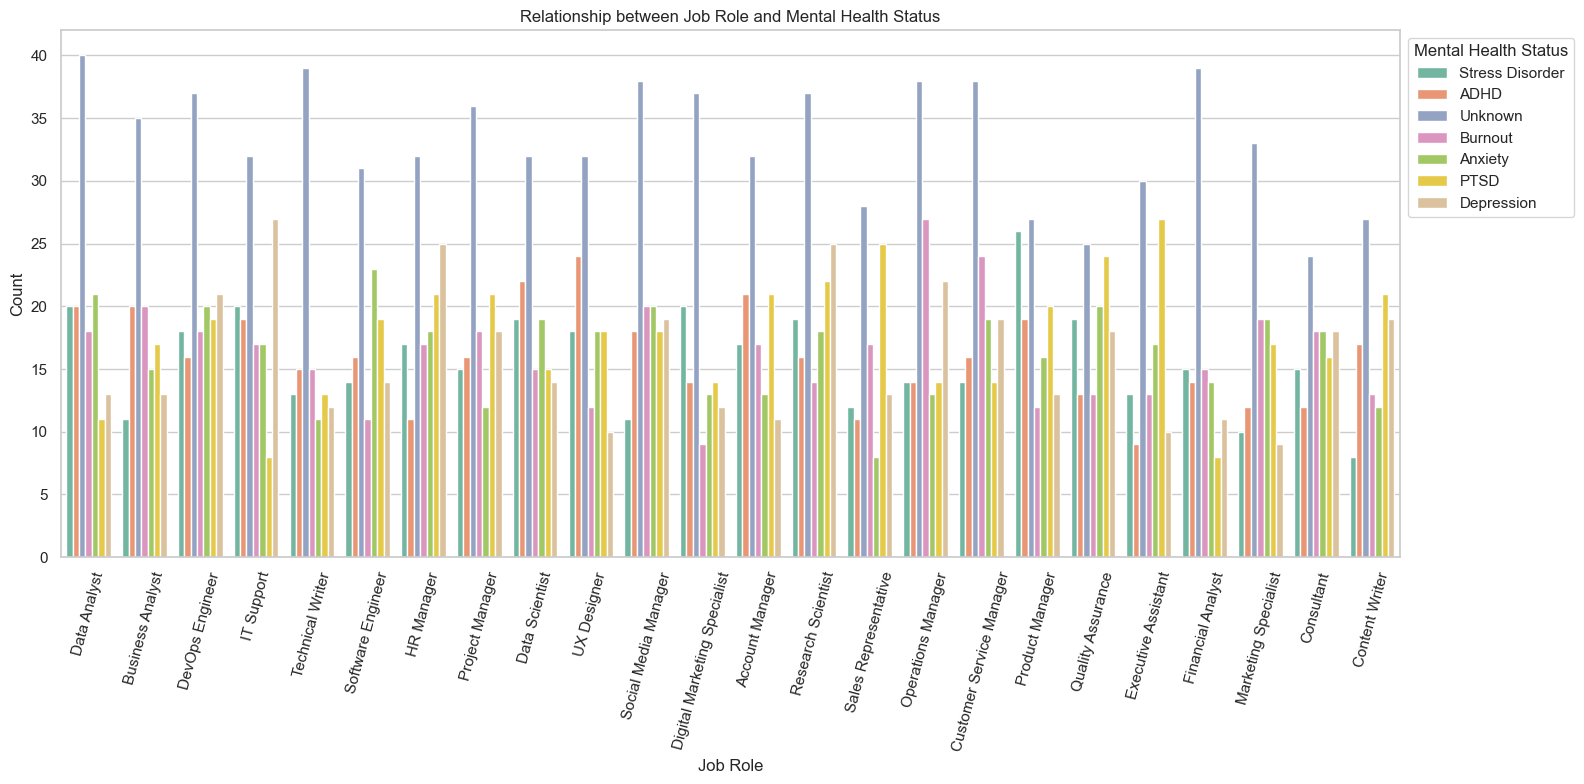

In [67]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Job_Role', hue='Mental_Health_Status', palette='Set2')
plt.title('Relationship between Job Role and Mental Health Status')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.legend(title='Mental Health Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Relationship between Job Role and Mental Health Status

The countplot visualizing the relationship between Job Role and Mental Health Status shows that certain job roles have higher counts of reported mental health challenges such as stress disorders, ADHD, PTSD, and depression. For example, roles like Research Scientist, DevOps Engineer, and Operations Manager tend to report more cases of high burnout, stress disorders, and other mental health issues. Conversely, roles such as Technical Writer and HR Manager show relatively fewer instances of reported mental health concerns. The presence of a significant "Unknown" category across many roles suggests underreporting or lack of diagnosis.

Indications:
- Role-Specific Stressors: Technical and managerial roles may be more susceptible to mental health challenges due to higher workloads, job complexity, or operational pressures.
- Need for Targeted Support: Organizations should consider providing targeted mental health resources and interventions for roles with higher reported issues, such as counseling, stress management programs, and workload balancing.
- Awareness and Reporting: The large "Unknown" category highlights the need for better mental health awareness, destigmatization, and easier access to mental health assessments.
- Policy Implications: HR policies should be tailored to address the unique mental health risks associated with specific job roles, promoting a supportive work environment and reducing burnout.
- Employee Well-being: Regular monitoring and open discussions about mental health can help identify at-risk groups and foster a culture of well-being and support across all job roles.

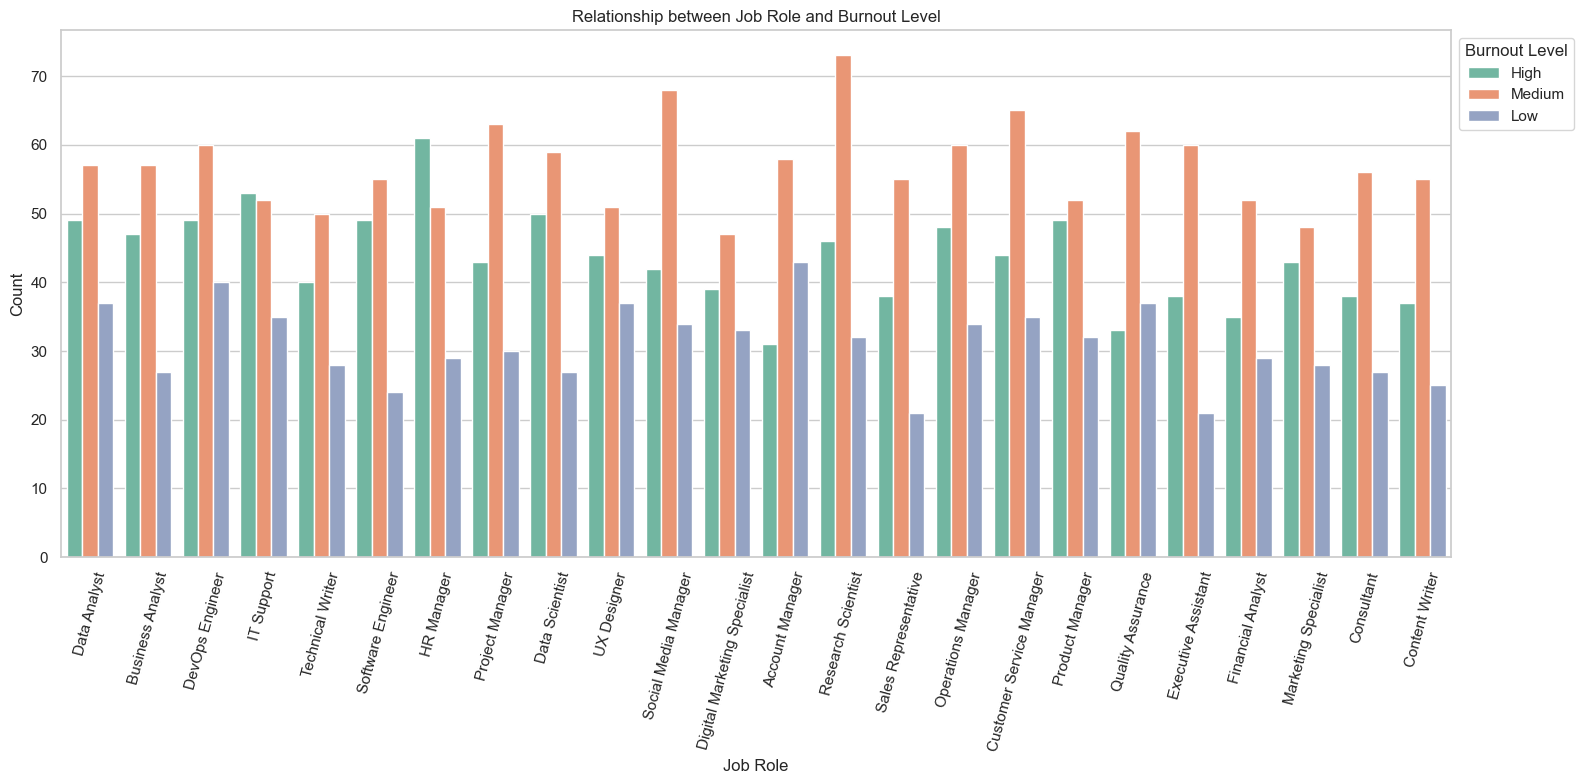

In [68]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Job_Role', hue='Burnout_Level', palette='Set2')
plt.title('Relationship between Job Role and Burnout Level')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.legend(title='Burnout Level', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Relationship between Job Role and Burnout Level

The countplot illustrating the relationship between Job Role and Burnout Level reveals that certain job roles, such as DevOps Engineer, Research Scientist, and Operations Manager, have a higher number of employees reporting medium to high burnout levels. In contrast, roles like Technical Writer and HR Manager tend to have more employees with low or medium burnout. The distribution of burnout levels varies significantly across job roles, indicating that job responsibilities and work environments contribute differently to employee stress and exhaustion.

Indications:
- Role-Specific Burnout Risks: Technical and managerial roles are more prone to higher burnout, likely due to demanding workloads, tight deadlines, and operational pressures.
- Targeted Interventions Needed: Organizations should prioritize burnout prevention strategies for high-risk roles, such as workload management, flexible scheduling, and access to mental health resources.
- Monitoring and Support: Regular assessment of burnout levels by job role can help identify at-risk groups early and enable timely support.
- Policy Implications: HR policies should be tailored to address the unique stressors associated with specific job roles, promoting a healthier and more sustainable work environment.
- Employee Retention: Addressing burnout proactively can improve job satisfaction, reduce turnover, and enhance overall organizational productivity.

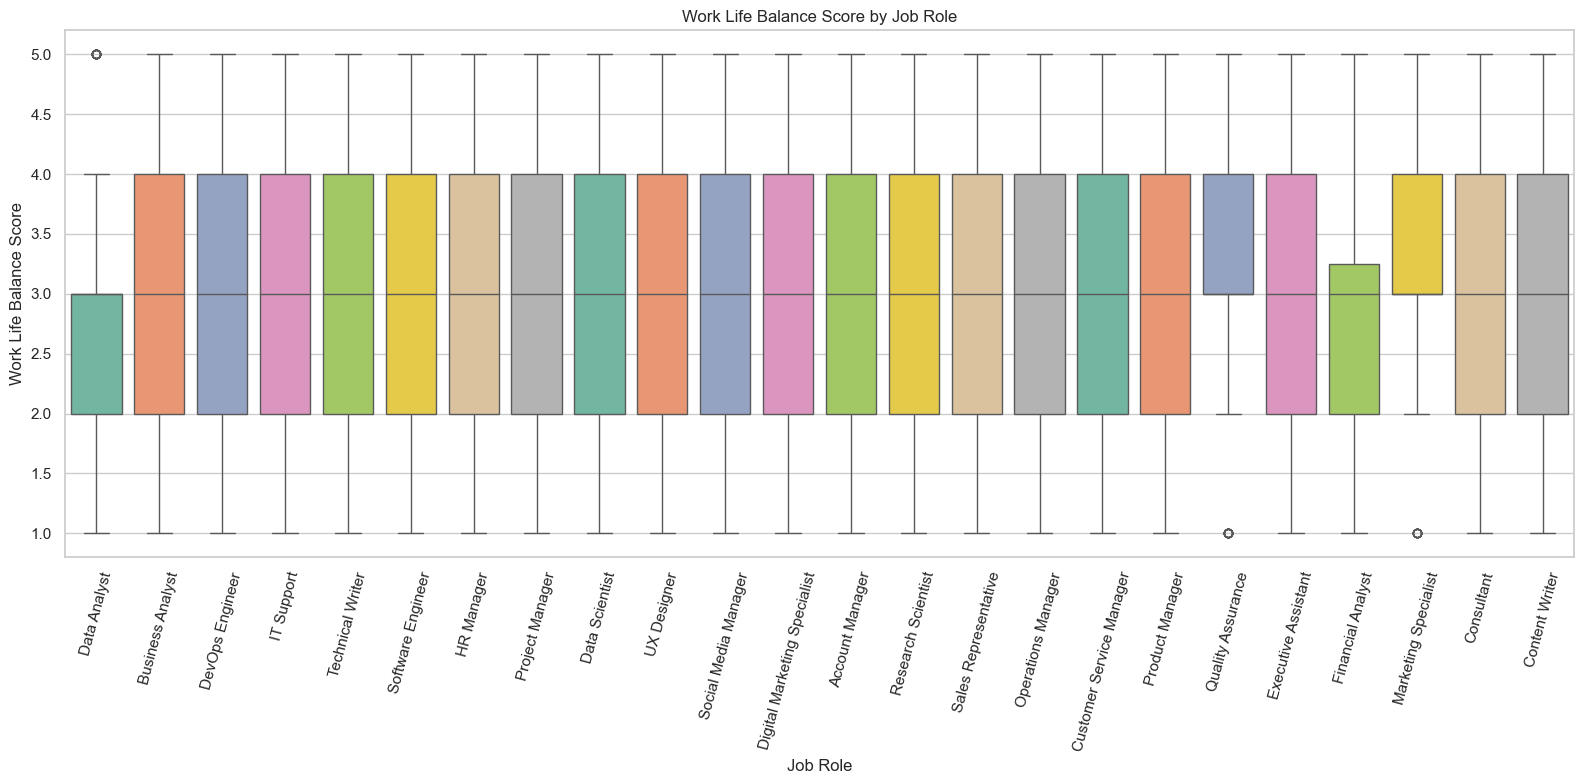

In [69]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='Job_Role', y='Work_Life_Balance_Score', palette='Set2')
plt.title('Work Life Balance Score by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Work Life Balance Score')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


### Work Life Balance Score by Job Role

The boxplot of Work Life Balance Score by Job Role reveals significant variation in perceived work-life balance across different positions. Some roles, such as Technical Writer, HR Manager, and Content Writer, tend to have higher median work-life balance scores, indicating that employees in these positions generally experience a better balance between their professional and personal lives. In contrast, roles like DevOps Engineer, Operations Manager, and Research Scientist often show lower median scores and a wider spread, suggesting more challenges in achieving work-life balance and greater variability in individual experiences.

Indications:
- Role-Specific Challenges: Technical and managerial roles may face greater demands or less flexibility, leading to lower work-life balance scores. Organizations should consider targeted interventions, such as flexible scheduling or workload adjustments, for these groups.
- Best Practices from High-Scoring Roles: Roles with consistently high work-life balance scores can serve as models for developing policies and practices that promote well-being across the organization.
- Employee Support: Regular assessment of work-life balance by job role can help identify at-risk groups and inform the design of wellness programs, mental health resources, and support systems.
- Talent Attraction and Retention: Understanding which roles offer better work-life balance can help organizations attract and retain talent by aligning job expectations with employee preferences.
- Policy Development: Insights from this analysis can guide HR in creating role-specific policies that foster a healthier, more productive, and more satisfied workforce.

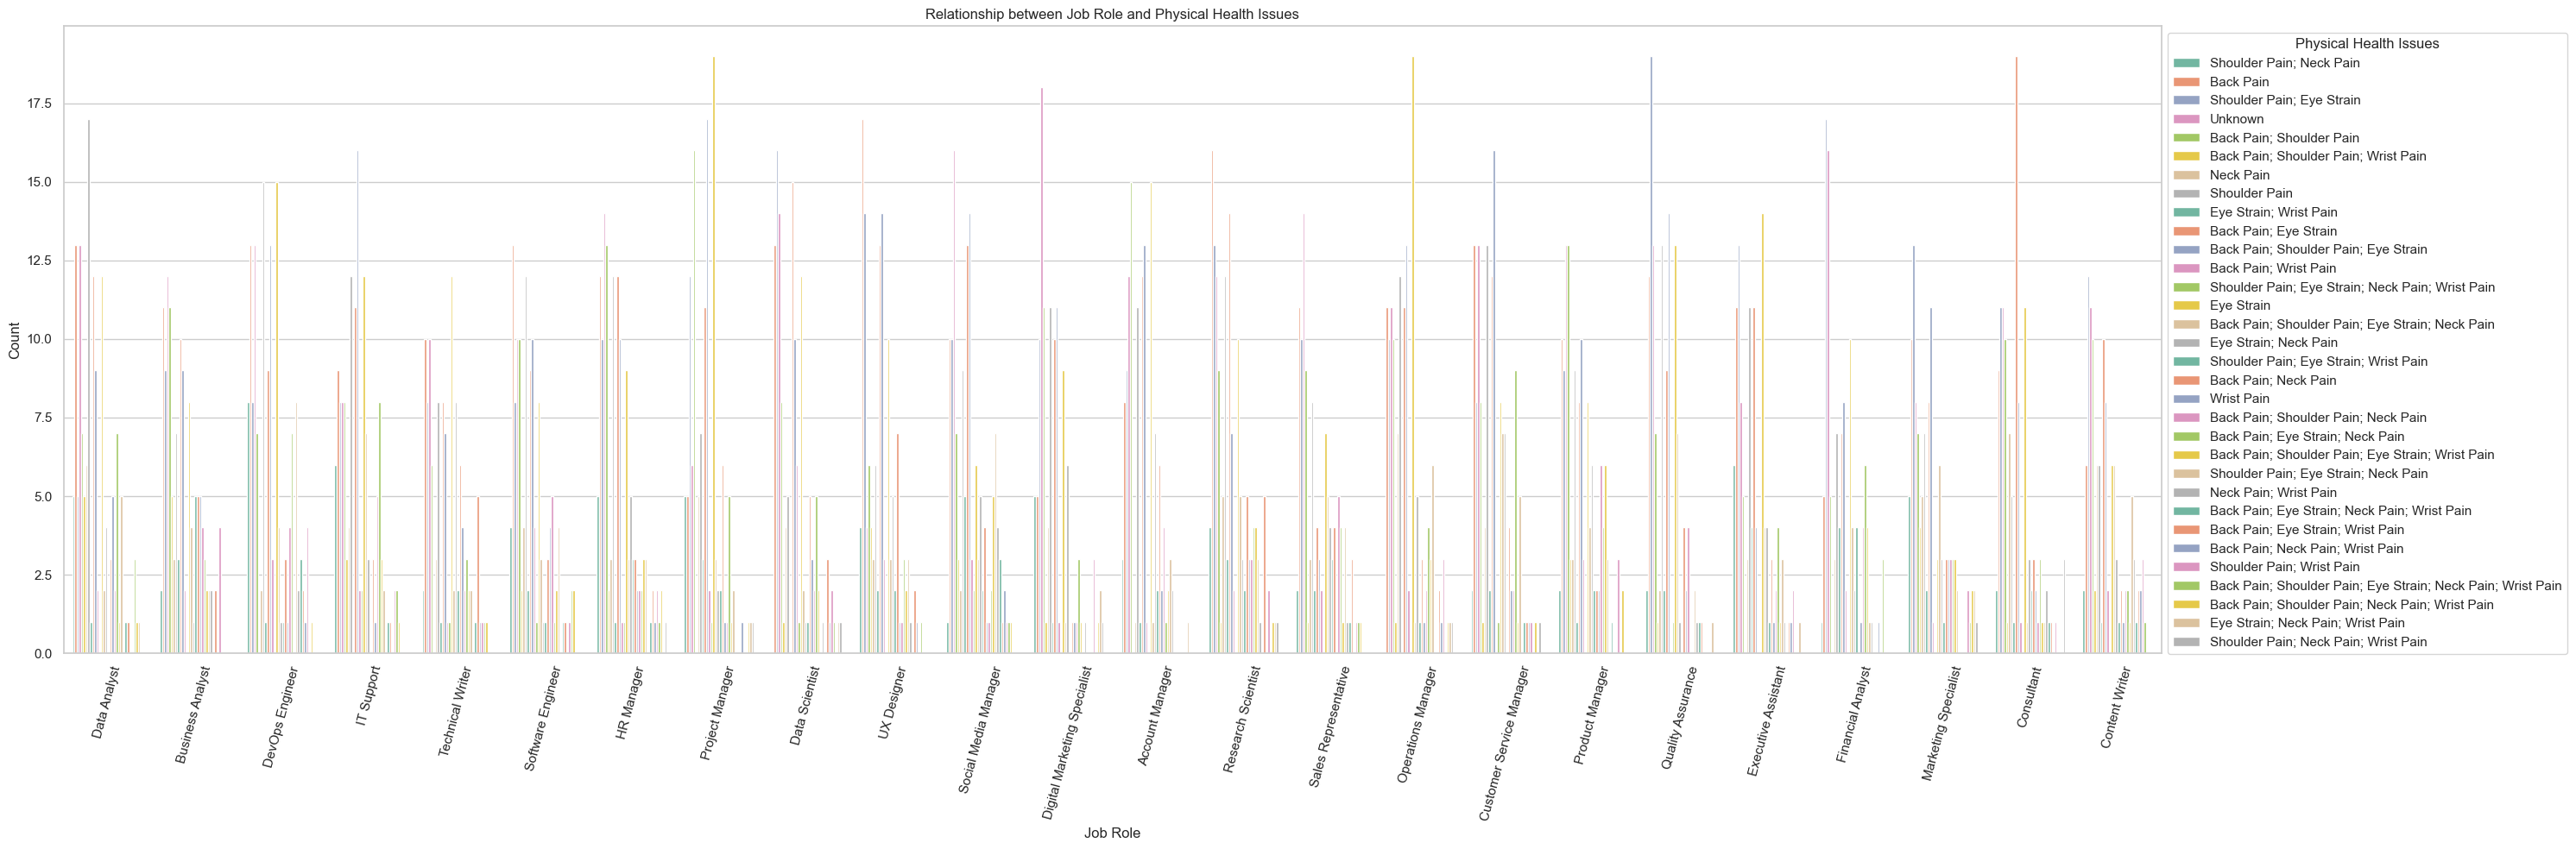

In [70]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Job_Role', hue='Physical_Health_Issues', palette='Set2')
plt.title('Relationship between Job Role and Physical Health Issues')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.legend(title='Physical Health Issues', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Relationship between Job Role and Physical Health Issues

The countplot illustrating the relationship between Job Role and Physical Health Issues reveals that certain job roles are more frequently associated with specific physical health complaints. For example, roles such as DevOps Engineer, Research Scientist, and Operations Manager show higher counts of issues like shoulder pain, neck pain, and eye strain. These roles often involve prolonged computer use, repetitive tasks, or high-stress environments, which can contribute to musculoskeletal and vision-related problems. Conversely, roles such as Technical Writer and HR Manager tend to report fewer physical health issues, possibly due to more flexible work patterns or less physically demanding tasks. The presence of the "Unknown" category across many roles suggests that some employees may not recognize or report their symptoms, indicating potential underreporting.

Indications:
- Role-Specific Risks: Technical and operational roles are at greater risk for physical health issues due to the nature of their work. Organizations should prioritize ergonomic interventions, regular breaks, and health education for these groups.
- Preventive Measures: Implementing workplace wellness programs, providing ergonomic equipment, and encouraging movement can help reduce the incidence of physical health complaints.
- Awareness and Reporting: The significant "Unknown" category highlights the need for better awareness and easier reporting mechanisms for physical health issues.
- Policy Implications: HR policies should address the unique physical health risks associated with specific job roles, ensuring targeted support and resources.
- Employee Well-being: Regular monitoring and proactive management of physical health can improve employee satisfaction, reduce absenteeism, and enhance overall productivity.

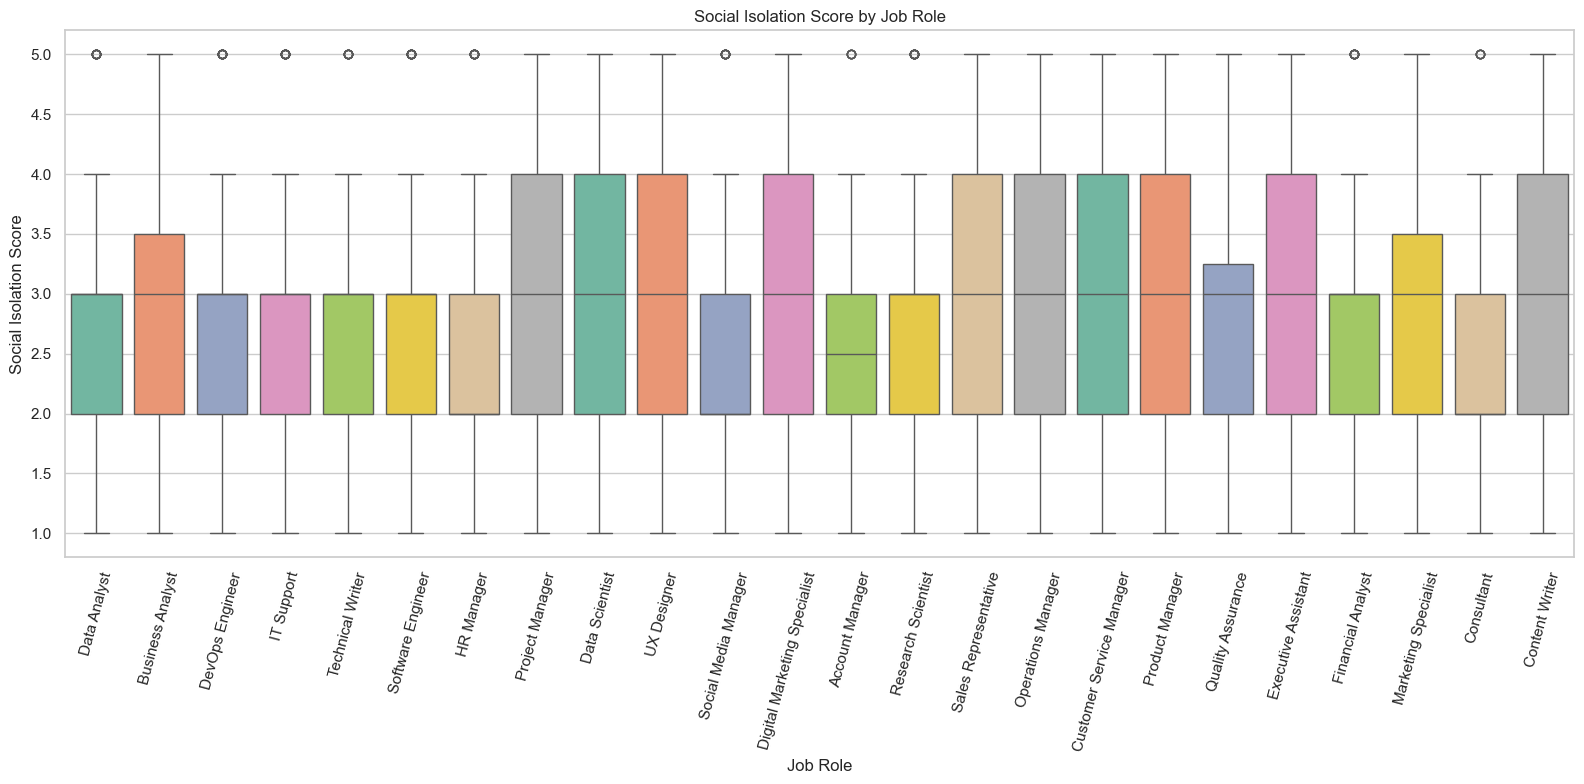

In [71]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='Job_Role', y='Social_Isolation_Score', palette='Set2')
plt.title('Social Isolation Score by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Social Isolation Score')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

### Social Isolation Score by Job Role

The boxplot of Social Isolation Score by Job Role reveals notable differences in perceived social isolation across various positions. Certain roles, such as Technical Writer, Software Engineer, and Research Scientist, tend to have higher median social isolation scores, indicating that employees in these positions may experience greater feelings of isolation. In contrast, roles like HR Manager, Customer Service Manager, and Operations Manager generally show lower median scores, suggesting more frequent social interaction or stronger workplace connectivity. The spread of scores within each job role highlights variability in individual experiences, possibly influenced by work arrangement, team dynamics, or organizational culture.

Indications:
- Role-Specific Risks: Technical and research-oriented roles may be more susceptible to social isolation, likely due to the independent nature of their work or limited collaboration opportunities. Organizations should consider targeted interventions, such as virtual team-building activities or regular check-ins, for these groups.
- Supportive Environments: Roles with lower social isolation scores often involve more interpersonal communication or team-based tasks. Best practices from these roles can inform strategies to foster connection and engagement across the organization.
- Well-being Initiatives: Regular assessment of social isolation by job role can help identify at-risk groups and inform the design of support programs, such as mentorship, peer networks, or social events.
- Policy Development: Insights from this analysis can guide HR in creating role-specific policies that promote social connection, reduce isolation, and enhance overall employee well-being.
- Talent Retention: Addressing social isolation proactively can improve job satisfaction, reduce turnover, and support a positive organizational culture, especially in remote and hybrid work environments.